# Intial data exploration

This is the first notebook for the NY Price Estimator demo project, containing initial data exploration and checking the preprocessing operations required to generate a clean dataset for modeling.

In [1]:
import os
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

## Access data from Minio

Raw dataset for the project was uploaded to Minio. From Jupyter and Vscode, we can access it via the mounted `shared-storage` volume:

In [2]:
DIR_REPO = Path.cwd().parent.parent.parent
DIR_MINIO = DIR_REPO.parent.parent / "shared-storage" / "ny-price-estimator" / "data"
DIR_DATA_RAW = Path(DIR_MINIO) / "base"
DIR_DATA_PROCESSED = Path(DIR_MINIO) / "created"

In [3]:
os.listdir(DIR_DATA_RAW)

['listings.csv']

^ This is the file as downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) under the Creative Commons Universal licence (CC0 1.0).

In [4]:
FILEPATH_DATA = DIR_DATA_RAW / "listings.csv"

In [5]:
df_raw = pd.read_csv(FILEPATH_DATA)
df_raw.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (43,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15509,https://www.airbnb.com/rooms/15509,20181103152857,2018-11-04,Sleep at the CozySuite Sanctuary,Self catering lodging / vacation rental --fu...,We welcome travelers to CozySuite to sleep by ...,Self catering lodging / vacation rental --fu...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,7,0.13
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
2,2539,https://www.airbnb.com/rooms/2539,20181103152857,2018-11-04,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35
4,15729,https://www.airbnb.com/rooms/15729,20181103152857,2018-11-04,Village Green,NaN,Beautiful bedroom in a duplex house with large...,Beautiful bedroom in a duplex house with large...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.21


## Explore data processing

In [6]:
df_raw.shape

(50968, 96)

### Select columns

In [7]:
df_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

For an initial model, we are only going to use a small subset of the columns.

In [8]:
COLUMNS = ['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'zipcode', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price']

In [9]:
df = df_raw[COLUMNS].copy()
df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price
0,15509,Brooklyn,Apartment,Private room,11221,40.685384,-73.932709,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Lock on b...",$59.00
1,2515,Manhattan,Apartment,Private room,10026,40.799205,-73.953676,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$59.00
2,2539,Brooklyn,Apartment,Private room,11218,40.647486,-73.972370,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$149.00
3,2595,Manhattan,Apartment,Entire home/apt,10018,40.753621,-73.983774,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00
4,15729,Brooklyn,House,Private room,11231,40.676947,-74.011209,4,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",$89.00


### Check for missing values

In [10]:
df.isna().sum()

id                 0
neighbourhood      0
property_type      0
room_type          0
zipcode          779
latitude           0
longitude          0
accommodates       0
bathrooms         98
bedrooms          56
beds              61
bed_type           0
amenities          0
price              0
dtype: int64

In [11]:
df = df.dropna(axis=0)

### Check the target variable

In [12]:
# Convert string to numeric
df['price'] = df['price'].str.extract(r"(\d+).")
df['price'] = df['price'].astype(int)

In [13]:
# Summary statistics

df['price'].describe()

count    50015.000000
mean       139.633770
std        113.033383
min          0.000000
25%         68.500000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

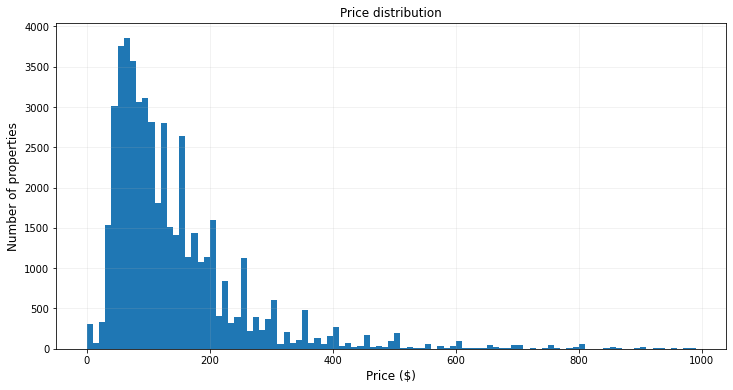

In [14]:
# Plot price distribution

fontsize_labels = 12

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['price'], bins=range(0, max(df['price']), 10))
ax.grid(alpha=0.2)
ax.set_title('Price distribution', fontsize=fontsize_labels)
ax.set_ylabel('Number of properties', fontsize=fontsize_labels)
ax.set_xlabel('Price ($)', fontsize=fontsize_labels)
plt.show()

Remove the listings where price is between \\$0 and \\$10.

In [15]:
df = df[df['price'] >= 10]

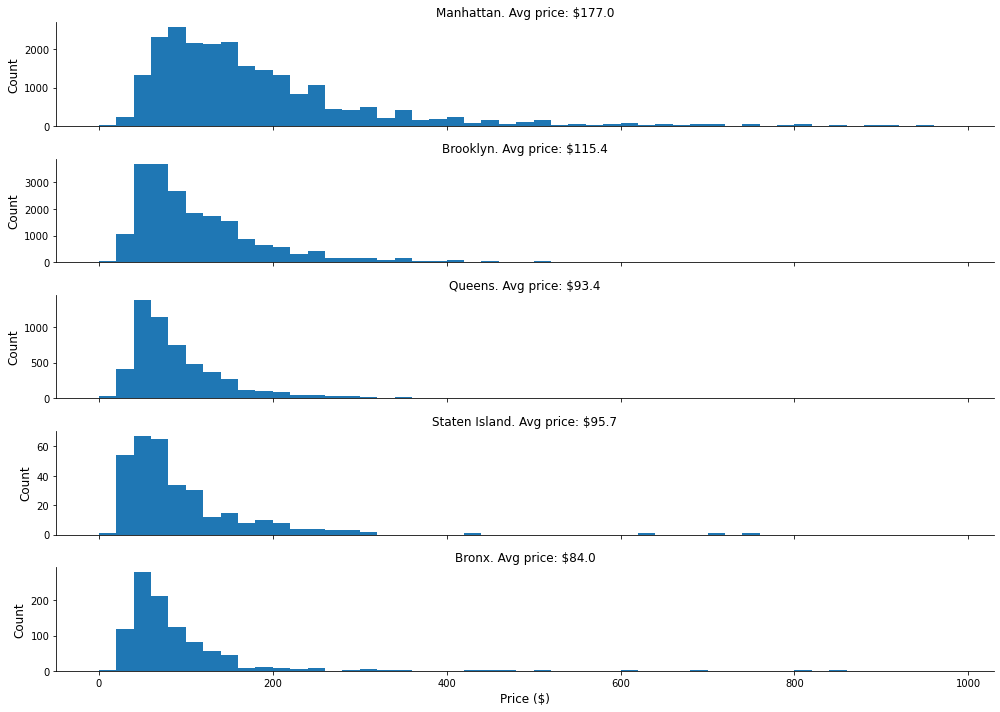

In [16]:
# Break down by neighbourhood:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)

axes = [ax1, ax2, ax3, ax4, ax5]
neighbourhood = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for i, ax in enumerate(axes):
    values = df[df['neighbourhood'] == neighbourhood[i]]['price']
    avg = round(values.mean(), 1)
    ax.hist(values, bins=range(0, max(df['price']), 20))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{neighbourhood[i]}. Avg price: ${avg}', fontsize=fontsize_labels)
    ax.set_ylabel('Count', fontsize=fontsize_labels)

ax.set_xlabel('Price ($)', fontsize=fontsize_labels)

plt.tight_layout()
plt.show()

In [17]:
# Create a categorical price column corresponding to Low ($0-$90), Mid ($90-$180), High ($180-$400) and Luxury ($400+) properties

df['category'] = pd.cut(df['price'], bins=[10, 90, 180, 400, np.inf], labels=[0, 1, 2, 3])
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,category
1,2515,Manhattan,Apartment,Private room,10026,40.799205,-73.953676,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",59,0
2,2539,Brooklyn,Apartment,Private room,11218,40.647486,-73.972370,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1
3,2595,Manhattan,Apartment,Entire home/apt,10018,40.753621,-73.983774,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,2
4,15729,Brooklyn,House,Private room,11231,40.676947,-74.011209,4,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",89,0
5,3330,Brooklyn,Apartment,Private room,11206,40.708558,-73.942362,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",70,0


In [18]:
df['category'].value_counts()

0    20181
1    18186
2     9796
3     1514
Name: category, dtype: int64

### Extract column information for amenities

In [19]:
def preprocess_amenities_column(df: DataFrame) -> DataFrame:
    
    df['TV'] = df['amenities'].str.contains('TV')
    df['TV'] = df['TV'].astype(int)
    df['Internet'] = df['amenities'].str.contains('Internet')
    df['Internet'] = df['Internet'].astype(int)
    df['Air_conditioning'] = df['amenities'].str.contains('Air conditioning')
    df['Air_conditioning'] = df['Air_conditioning'].astype(int)
    df['Kitchen'] = df['amenities'].str.contains('Kitchen')
    df['Kitchen'] = df['Kitchen'].astype(int)
    df['Heating'] = df['amenities'].str.contains('Heating')
    df['Heating'] = df['Heating'].astype(int)
    df['Wifi'] = df['amenities'].str.contains('Wifi')
    df['Wifi'] = df['Wifi'].astype(int)
    df['Elevator'] = df['amenities'].str.contains('Elevator')
    df['Elevator'] = df['Elevator'].astype(int)
    df['Breakfast'] = df['amenities'].str.contains('Breakfast')
    df['Breakfast'] = df['Breakfast'].astype(int)

    df.drop('amenities', axis=1, inplace=True)
    
    return df


df = preprocess_amenities_column(df)
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,...,price,category,TV,Internet,Air_conditioning,Kitchen,Heating,Wifi,Elevator,Breakfast
1,2515,Manhattan,Apartment,Private room,10026,40.799205,-73.953676,3,1.0,1.0,...,59,0,1,1,1,1,1,1,0,0
2,2539,Brooklyn,Apartment,Private room,11218,40.647486,-73.972370,4,1.0,1.0,...,149,1,1,1,0,1,1,1,1,0
3,2595,Manhattan,Apartment,Entire home/apt,10018,40.753621,-73.983774,2,1.0,0.0,...,225,2,1,0,1,1,1,1,0,0
4,15729,Brooklyn,House,Private room,11231,40.676947,-74.011209,4,1.0,1.0,...,89,0,0,0,1,1,1,1,0,0
5,3330,Brooklyn,Apartment,Private room,11206,40.708558,-73.942362,2,1.0,1.0,...,70,0,1,1,0,1,1,1,1,0


This is the processed data that we will be using in the first instance for modeling.

## Preprocessed dataset creation

In principle, we could save the above-created dataset from Jupyter directly, but that can create problems: the processed dataset could easily change upon rerunning an altered version of the notebook, without keeping track of the code that generated different versions of it. Instead, in order to maintain full traceability and reproducibility, we convert the code to a .py script and run it on the Drone agents. This way, the processed dataset is associated with a specific Drone run and with the exact version of the code that generated it, creating a fully reproducible pipeline:

- The preprocessing code is rewritten as a clean .py script in Vscode ([data/creation/01-creation-preprocess_data.py](https://gitea.kdl-demo.konstellation.io/kdl/ny-price-estimator/src/tag/preprocess-data-v0/data/creation/01-creation-preprocess_data.py)).
- The code is sent for execution on Drone agents using a .drone.yml file ([.drone.yml](https://gitea.kdl-demo.konstellation.io/kdl/ny-price-estimator/src/tag/preprocess-data-v0/.drone.yml))
- The execution of the preprocessing code can be inspected in the Drone interface ([run detail](https://drone.kdl-demo.konstellation.io/kdl/ny-price-estimator/4/)). The execution is associated with a specific commit or tag and can be reproduced at will.
- The results are persisted in the corresponding S3 bucket on Minio (in [ny-price-estimator/data/created](https://minio.kdl-demo.konstellation.io/minio/ny-price-estimator/data/created/))